# ¿Qué son los datos ráster?

En su forma más simple, un ráster consta de una matriz de celdas (o píxeles) organizadas en filas y columnas (o una cuadrícula) en la que cada celda contiene un valor que representa información, como la temperatura. Los rásteres son fotografías aéreas digitales, imágenes de satélite, imágenes digitales o incluso mapas escaneados.

<img src = "celda.png"  width="400" height="200"/>

# Características generales de datos ráster

* En los datasets ráster, cada celda (también conocida como píxel) posee un valor. 
* Los valores de celda representan el fenómeno descrito por el dataset ráster, como, por ejemplo:
    * Categoría: una pradera, bosque o carretera
    * Magnitud: gravedad, contaminación acústica o porcentaje de precipitaciones 
    * Altura: elevación de superficie por encima del nivel medio del mar 
    * Valor espectral: se utilizan en las imágenes de satélite y en las fotografías aéreas para representar la reflectancia de la luz y el color. 
 
* Los valores de celda pueden ser positivos o negativos, enteros o de punto flotante. Los valores enteros es mejor utilizarlos para representar datos categóricos (discretos) y los valores de punto flotante para representar superficies continuas. 

El área (o superficie) representada por cada celda contiene el mismo ancho y altura, y es una parte equivalente a toda la superficie representada por el ráster. Por ejemplo, un ráster que represente la elevación (es decir, modelo digital de elevación) puede cubrir un área de 100 kilómetros cuadrados. En el caso en el que hubiera 100 celdas en este ráster, cada celda representaría 1 kilómetro cuadrado con ancho y altura iguales (es decir, 1 km x 1 km).

<img src = "celda_2.gif"  width="150" height="200"/>

La dimensión de las celdas puede ser tan grande o pequeña como sea necesario para representar la superficie transmitida por el dataset ráster y las entidades dentro de la superficie, como, por ejemplo, un kilómetro cuadrado, un pie cuadrado o incluso un centímetro cuadrado. El tamaño de celda determina el grosor o la delgadez con la que aparecerán los patrones o las entidades en el ráster. Cuanto más pequeño sea el tamaño de celda, más suave o más detallado será el ráster. Sin embargo, cuanto mayor sea el número de celdas, más tiempo tardará en procesar, aumentándose a su vez la demanda de espacio de almacenamiento. Si el tamaño de una celda es demasiado grande, se podría perder información o los patrones sutiles podrían oscurecerse. Por ejemplo, si el tamaño de celda es superior al ancho de una carretera, la carretera podría no existir en el dataset ráster. En el siguiente diagrama podrá apreciar la forma en la que esta entidad poligonal simple se representará mediante un dataset ráster en varios tamaños de celda.



<img src = "celdas.gif"  width="450" height="200"/>

La ubicación de cada celda se define por la fila o columna en la que se ubica dentro de la matriz ráster. Esencialmente, la matriz queda representada por un sistema de coordenadas cartesianas, en las que las filas de la matriz son paralelas al eje x y las columnas al eje y del plano cartesiano. Los valores de fila y columna parten de 0. En el siguiente ejemplo, si el ráster se encuentra en un sistema de coordenadas proyectadas de proyección universal transversal de Mercator (UTM) y posee un tamaño de celda de 100, la ubicación de celda en 5,1 sería 300.500 este, 5.900.600 norte.

<img src = "raster.gif"  width="500" height="200"/>

En ocasiones deberá especificar la extensión de un ráster. La extensión queda definida por las coordenadas superior, inferior, izquierda y derecha del área rectangular cubierta por un ráster, tal y como se muestra a continuación:

<img src = "coord.gif"  width="350" height="200"/>

# Ejemplo: Batimetría

La batimetría es el equivalente submarino de la altimetría. El nombre proviene del griego βαθύς [vazýs] (‘profundo’), y μετρóν [metrón] (‘medida’). En otras palabras, la batimetría es el estudio de las profundidades marinas, de la tercera dimensión de los fondos lacustres o marinos. Un mapa batimétrico (o carta batimétrica) normalmente muestra el relieve del fondo o terreno como isógramas, y puede también dar información adicional de navegación en superficie.

<img src = "Bathymetric-Lake-Huron-National-Geophysical-Data-Center-2003.png"  width="500" height="200"/>

# ¿Como hacer un mapa batimétrico con python?

* Primero necesitamos los datos de la profundidad del cuerpo de agua.
* Utilizar los módulos para:
    * Importar datos desde un archivo ---  **Files**
    * Manipulación de datos --- **Loops y arrays**
    * Representación gráfica de rasters --- **Matplotlib**

# Formato de datos

El formato ráster Esri ASCII se puede utilizar para transferir información hacia o desde otros sistemas ráster o basados en celdas. Cuando un ráster existente es el resultado de un ráster de formato Esri ASCII, el archivo comenzará con la información del encabezado que define las propiedades del ráster como el tamaño de celda, el número de filas y columnas, y las coordenadas del origen del ráster. La información del encabezado está seguida por la información del valor de celda especificada en un orden mayor de filas delimitado por el espacio, con cada fila separada por un retorno de carro.

Para convertir un archivo ASCII a ráster, los datos deben estar en este mismo formato. Los parámetros en la parte del encabezado del archivo deben coincidir correctamente con la estructura de los valores de datos.

La estructura básica del ráster Esri ASCII tiene la información del encabezado al comienzo del archivo seguida por los datos del valor de celda:

* El centro de la celda inferior izquierda

* NCOLS xxx NROWS xxx XLLCENTER xxx YLLCENTER xxx CELLSIZE xxx NODATA_VALUE xxx row 1 row 2 ... row n

* La esquina inferior izquierda de la celda inferior izquierda

* NCOLS xxx NROWS xxx XLLCORNER xxx YLLCORNER xxx CELLSIZE xxx NODATA_VALUE xxx row 1 row 2 ... row n

* La fila 1 de los datos está en la parte superior del ráster, la fila 2 está justo debajo de la fila 1, y así sucesivamente

| Parámetro | Descripción | Requsitos |
|:-:|:-:|:-:|
|   NCOLS   | Cantidad de columnas de celdas  | Entero mayor que 0|
|   NROWS   | Cantidad de filas de celdas  | Entero mayor que 0|
|  XLLCENTER O XLLCORNER  | Coordenada `X` del origen (por el centro o la esquina inferior izquierda de la celda) | Hacer coincidir con el tipo de coordenada `y` |
|  YLLCENTER O YLLCORNER  | Coordenada `Y` del origen (por el centro o la esquina inferior izquierda de la celda) | Hacer coincidir con el tipo de coordenada `x` |
|   CELLSIZE   | Tamaño de celdas  | Mayor que 0|
|   NODATA_VALUE   | Los valores de entrada que serán NoData en el raste de salida  | Opcional, el valor por default es -9999|

# Ejemplo: 

En el siguiente ejemplo realizaremos un mapa Batimétrico del lago Erie, utilizando el concepto de raster:

## Lectura del archivo

Primero abrimos el archivo en el cual se encuentra la información batimétrica.

In [2]:
file_name = 'erie_lld.asc'#its a lake 

## Manipulacion de datos

Separamos el encabezado del archivo de los datos batimétricos.

In [3]:
header_rows = 6 # six rows for header information
header = {} # store header information including ncols, nrows, xllcorner, yllcorner, cellsize, NODATA_value
row_item = 1
with open(file_name, 'rt') as file_h:
     for line in file_h:
        if row_item <= 6:
             line = line.split(" ", 1)
             header[line[0]] = float(line[1])
        else:
             break
        row_item = row_item + 1

In [4]:
header

{'ncols': 7201.0,
 'nrows': 2401.0,
 'xllcenter': -84.0,
 'yllcenter': 41.0,
 'cellsize': 0.0008333333333,
 'nodata_value': -9999.0}

## Extracción de datos

Asignamos el contenido del archivo a un arreglo. Para ello usamos :

**numpy.loadtxt():**
* Load data from a text file.

Parameters:
* fname: file, str, pathlib.Path, list of str, generator

    File, filename, list, or generator to read. If the filename extension is .gz or .bz2, the file is first decompressed.

* dtype: data-type, optional

    Data-type of the resulting array; default: float. If this is a structured data-type, the resulting array will be 1-dimensional, and each row will be interpreted as an element of the array.

* comments: str or sequence of str, optional

    The characters or list of characters used to indicate the start of a comment. None implies no comments. For backwards compatibility, byte strings will be decoded as ‘latin1’. The default is ‘#’.

* delimiter: str, optional

    The string used to separate values. For backwards compatibility, byte strings will be decoded as ‘latin1’. The default is whitespace.

* converters: dict, optional

    A dictionary mapping column number to a function that will parse the column string into the desired value. E.g., if column 0 is a date string: converters = {0: datestr2num}. Converters can also be used to provide a default value for missing data (but see also genfromtxt): converters = {3: lambda s: float(s.strip() or 0)}. Default: None.

* skiprows: int, optional

    Skip the first skiprows lines, including comments; default: 0.

* usecols: int or sequence, optional

    Which columns to read, with 0 being the first. For example, usecols = (1,4,5) will extract the 2nd, 5th and 6th columns. The default, None, results in all columns being read.

* unpack: bool, optional

    If True, the returned array is transposed, so that arguments may be unpacked using x, y, z = loadtxt(...). When used with a structured data-type, arrays are returned for each field. Default is False.

* ndmin: int, optional

    The returned array will have at least ndmin dimensions. Otherwise mono-dimensional axes will be squeezed. Legal values: 0 (default), 1 or 2.

* max_rows: int, optional

    Read max_rows lines of content after skiprows lines. The default is to read all the lines.


* **Returns**

    out: ndarray
    
    Data read from the text file.

In [4]:
import numpy as np

In [5]:
header_rows = 6 
file_name = 'erie_lld.asc'#its a lake 
data_erie = np.loadtxt(file_name, skiprows=header_rows)

In [7]:
data_erie[0]

array([57.37854 , 57.37854 , 57.37854 , ..., 92.532043, 86.532043,
       92.532043])

## Visualización de los datos

Para visualizar los datos usaremos el módulo 

**matplotlib.pyplot.imshow():**

* Display data as an image, i.e., on a 2D regular raster.

    The input may either be actual RGB(A) data, or 2D scalar data, which will be rendered as a pseudocolor image. 
 
 
* Parameters:

    * X: array-like or PIL image
    
        The image data.

    * cmap: str or Colormap, default: rcParams["image.cmap"] (default: 'viridis')
    
        The Colormap instance or registered colormap name used to map scalar data to colors. This parameter is ignored for RGB(A) data.

    * norm: Normalize, optional
    
        The Normalize instance used to scale scalar data to the [0, 1] range before mapping to colors using cmap. By default, a linear scaling mapping the lowest value to 0 and the highest to 1 is used. This parameter is ignored for RGB(A) data.

    * aspect: {'equal', 'auto'} or float, default: rcParams["image.aspect"] (default: 'equal')
    
        The aspect ratio of the Axes. This parameter is particularly relevant for images since it determines whether data pixels are square.

        This parameter is a shortcut for explicitly calling Axes.set_aspect. See there for further details.

        * 'equal': Ensures an aspect ratio of 1. Pixels will be square (unless pixel sizes are explicitly made non-square in data coordinates using extent).

        * 'auto': The Axes is kept fixed and the aspect is adjusted so that the data fit in the Axes. In general, this will result in non-square pixels.

    * alpha: float or array-like, optional
    
        The alpha blending value, between 0 (transparent) and 1 (opaque). If alpha is an array, the alpha blending values are applied pixel by pixel, and alpha must have the same shape as X.

    * vmin, vmax: float, optional
    
        When using scalar data and no explicit norm, vmin and vmax define the data range that the colormap covers. By default, the colormap covers the complete value range of the supplied data. It is an error to use vmin/vmax when norm is given. When using RGB(A) data, parameters vmin/vmax are ignored.

    * extent: floats (left, right, bottom, top), optional
    
        The bounding box in data coordinates that the image will fill. The image is stretched individually along x and y to fill the box.

        The default extent is determined by the following conditions. Pixels have unit size in data coordinates. Their centers are on integer coordinates, and their center coordinates range from 0 to columns-1 horizontally and from 0 to rows-1 vertically.

        Note that the direction of the vertical axis and thus the default values for top and bottom depend on origin:

        * For origin == 'upper' the default is (-0.5, numcols-0.5, numrows-0.5, -0.5).

        * For origin == 'lower' the default is (-0.5, numcols-0.5, -0.5, numrows-0.5).


* **Returns:**
    
    AxesImage, es decir una imagen ligada a los axes

Definimos la extensión del ráster, es decir una ventana del tamaño adecuado donde vamos a visualizar los datos 

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
data = np.random.rand(8, 90)# creamos un array de 8 filas y 90 columnas
#data

**Ejercicio:**

Defina una matriz $A$ de 2x3 (dos filas y tres columnas), usando el módulo imshow() grafique la matriz $A$, considere los parámetros extent y aspect. Considere $A=[[1,2,4],[4,2,5]]$


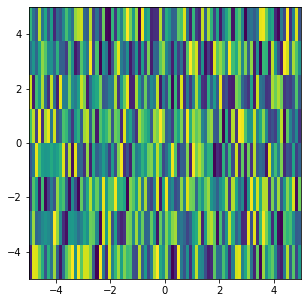

In [26]:
fig, ax =plt.subplots(figsize = (15,5))
plt.imshow(data, extent=(-5,5,-5,5), aspect ="auto")

**Solución**

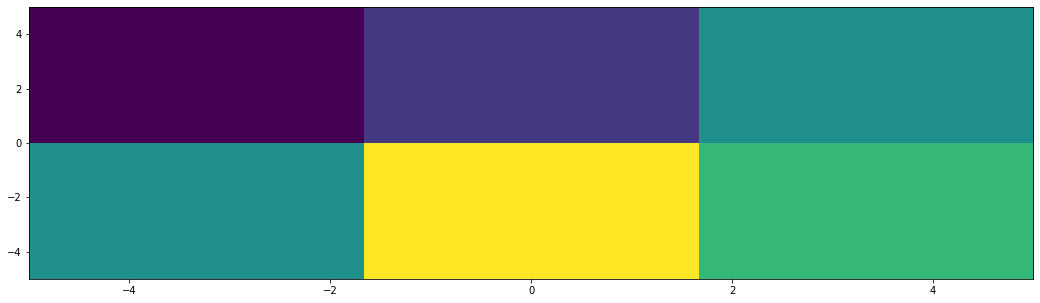

In [31]:
fig, ax = plt.subplots(figsize=(18,5))
A = np.array([[1,2,4],[4,7,5]])
ax.imshow(A, extent=(-5,5,-5,5), aspect='auto')

**Retomando el ejercicio**

In [32]:
data_erie

array([[ 57.37854 ,  57.37854 ,  57.37854 , ...,  92.532043,  86.532043,
         92.532043],
       [ 58.37854 ,  57.37854 ,  57.378555, ...,  89.532043,  88.532043,
         88.532043],
       [ 58.37854 ,  58.37854 ,  57.378555, ...,  89.532043,  88.532043,
         88.532043],
       ...,
       [ 43.507187,  45.507187,  46.507202, ..., 312.538055, 313.538055,
        312.538055],
       [ 43.507187,  47.507202,  48.507202, ..., 285.538055, 285.538055,
        287.538055],
       [ 48.507187,  51.507202,  50.507202, ..., 278.538055, 275.538055,
        276.538055]])

In [33]:
header

{'ncols': 7201.0,
 'nrows': 2401.0,
 'xllcenter': -84.0,
 'yllcenter': 41.0,
 'cellsize': 0.0008333333333,
 'nodata_value': -9999.0}

Definimos la extensión de la ventana (raster)

In [34]:
left = header['xllcenter']+header['ncols']*header['cellsize']
right = header['xllcenter']-header['ncols']*header['cellsize']
bottom = header['yllcenter']-header['nrows']*header['cellsize']
top = header['yllcenter']+header['nrows']*header['cellsize']
map_extent = (left, right, bottom, top)
a=4
#map_extent = (left,4*right, bottom, 4*top)

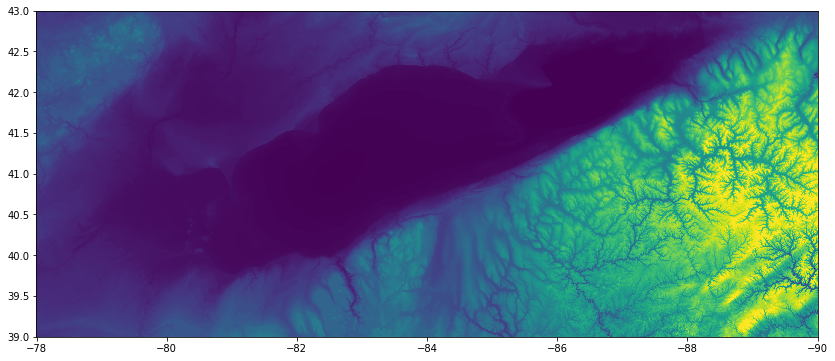

In [47]:
fig, img1 = plt.subplots(figsize=(14,6))
img1 = plt.imshow(data_erie, extent=map_extent,aspect='auto',cmap="viridis",vmin=-25, vmax=500.)

## Agregamos escala

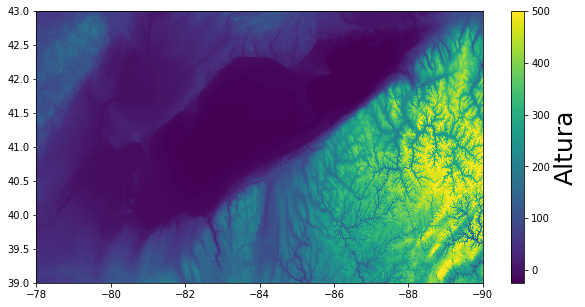

In [52]:
fig, img1 = plt.subplots(figsize=(10,5))
img1 = plt.imshow(data_erie, vmin=-25, vmax=500.,extent=map_extent,aspect='auto',cmap="viridis")

cba = plt.colorbar(img1)
cba.set_label("Altura", fontsize=25)

# Masked arrays

Masked arrays are arrays that may have missing or invalid entries. The numpy.ma module provides a nearly work-alike replacement for numpy that supports data arrays with masks.

# ¿What's a masked array?

In many circumstances, datasets can be incomplete or tainted by the presence of invalid data. For example, a sensor may have failed to record a data, or recorded an invalid value. The numpy.ma module provides a convenient way to address this issue, by introducing masked arrays.

A masked array is the combination of a standard numpy.ndarray and a mask. A mask is either nomask, indicating that no value of the associated array is invalid, or an array of booleans that determines for each element of the associated array whether the value is valid or not. When an element of the mask is False, the corresponding element of the associated array is valid and is said to be unmasked. When an element of the mask is True, the corresponding element of the associated array is said to be masked (invalid).

The package ensures that masked entries are not used in computations.

As an illustration, let’s consider the following dataset:

* 1 Genere una matriz $B$ de 5x5 de números random entre -10 y 10 (revise np.random.randint)
* 2 Enmascare los valores $B_{ij}\leq 0.$
* 3 Repita todos los punto anteriores para la condición $B_{ij}> 0.$
* 4 Visualize ambos casos utilizando imshow()
* 5 Agregue barra de colores 

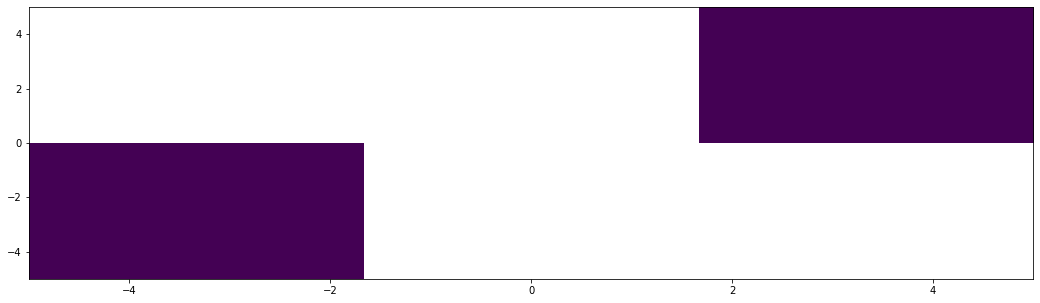

In [59]:
X = np.array([[1,2,4],[4,2,-5]])
X_m = np.ma.masked_array(X, X<=3)
fig, ax = plt.subplots(figsize=(18,5))
img1 = plt.imshow(X_m, extent=(-5,5,-5,5),aspect='auto')

In [56]:
X = np.array([[1,2,4],[4,2,-5]])
X_m = np.ma.masked_array(X, X<=0)
X_m

masked_array(
  data=[[1, 2, 4],
        [4, 2, --]],
  mask=[[False, False, False],
        [False, False,  True]],
  fill_value=999999)

**Ejercicio**

In [ ]:
data1
data2

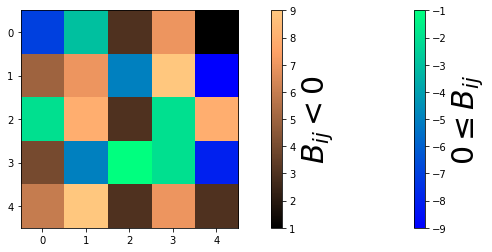

In [62]:
img = np.random.randint(-10, 10, (5, 5))#num random entre -10 y 10, 5 column y 5 filas

data1 = np.ma.masked_array(img, img >= 0)
data2 = np.ma.masked_array(img, img < 0)

fig, ax = plt.subplots(figsize=(15,4))

img1 = ax.imshow(data1, cmap="winter")
img2 = ax.imshow(data2, cmap="copper")

bar1 = plt.colorbar(img1)
bar2 = plt.colorbar(img2)

bar1.set_label('$0 \leq B_{ij}$',fontsize=30)
bar2.set_label('$B_{ij}<0$',fontsize=30)
